<a href="https://colab.research.google.com/github/MisGall10/Practica_19_Misael_Gallardo/blob/main/Practica19MAGC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Practica # 19. Ejercicios con EDA 2

**Descripción del conjunto de datos:**
Utiliza el conjunto de datos "Haberman's Survival" disponible en el siguiente 'https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"'. Este conjunto contiene datos de pacientes con cáncer de mama, incluyendo edad, año de operación, número de ganglios axilares y estado de supervivencia (categórico). El conjunto de datos tiene valores faltantes.

Puedes emplear este codigo para cargar tu codigo
```
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
column_names = ['age', 'year', 'nodes', 'status']
data = pd.read_csv(url, header=None, names=column_names)
```
1. Descargar el archivo haberman.data desde el enlace proporcionado.

2. Realizar un EDA completo, incluyendo:

    * Descripción de los datos.

    * Histogramas para las columnas numéricas.

    * Gráficas de barras para la columna categórica status (supervivencia).

    * Boxplots para identificar outliers en las columnas numéricas.

    * Matriz de correlación y mapa de calor.

    * Pairplot para visualizar relaciones entre variables numéricas.

    * Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) y QQplot para las columnas numéricas.


In [73]:
#Importamos las galerias a utulizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
column_names = ['age', 'year', 'nodes', 'status']
df = pd.read_csv(url, header=None, names=column_names)
#data["status"] = data["status"].astype(str)
#Realizamos una analasis de los datos
print('Descripcion de los datos (Estadisicas Descriptivas):\n')
print(df.describe())


Descripcion de los datos (Estadisicas Descriptivas):

              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


Histograma para las columnas numericas:



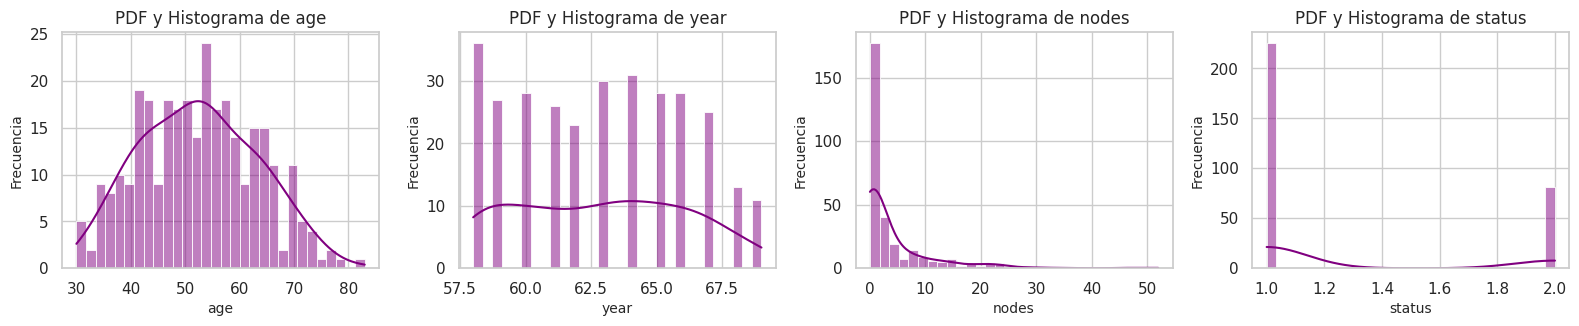

In [74]:
#Realizamos un histograma para cada columna numerica
num_columns = df.select_dtypes(include=['float64','int']).columns
#Creamos los gráficos de PDF e Histograma
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True, bins=30, color='purple')
    plt.title(f'PDF y Histograma de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)
print('Histograma para las columnas numericas:\n')
plt.tight_layout()
plt.show()

<ipython-input-75-a199ce50090e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=df, palette='Accent')
<ipython-input-75-a199ce50090e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='status', data=df, palette='Accent')


Gráficos de barras para columnas categorixas:



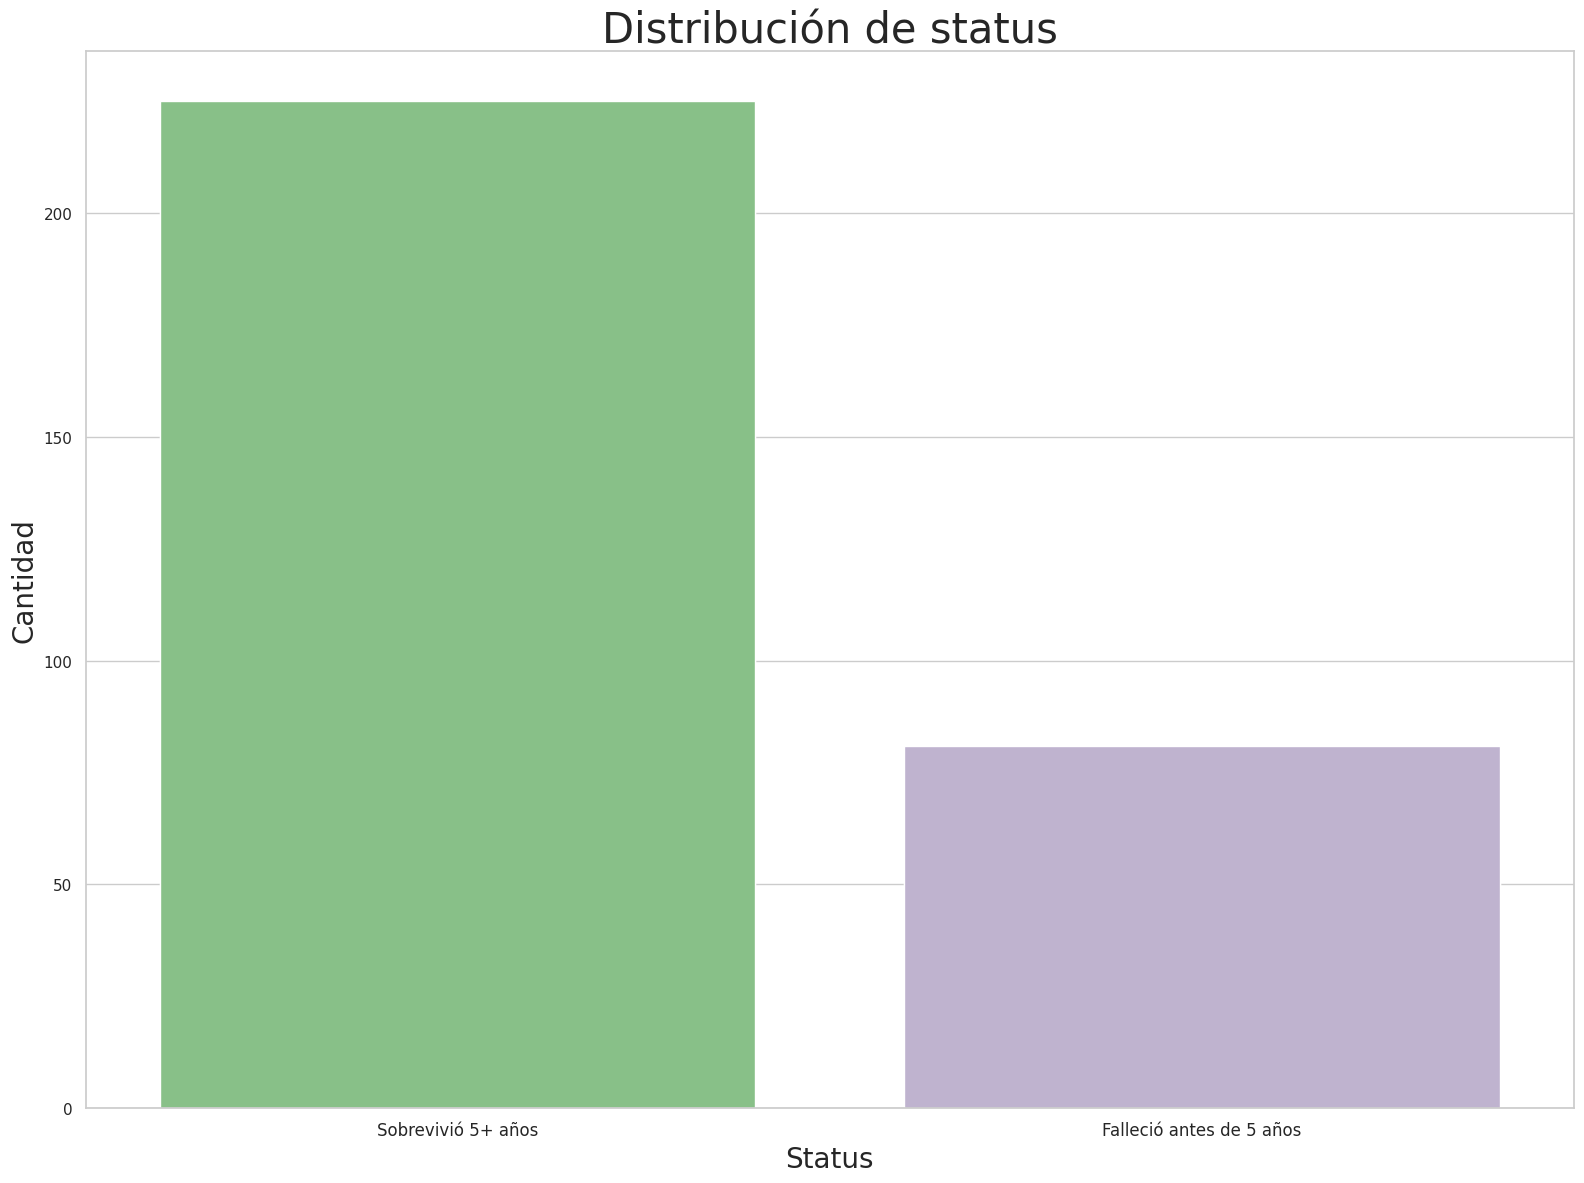

In [75]:
#Graficas de barras para las variables categorticas
#Crear gráficas de barras para cada variable categórica
plt.figure(figsize=(16, 12))
#Gráfica de barras para 'status'
sns.countplot(x='status', data=df, palette='Accent')
plt.title('Distribución de status', fontsize = 30)
plt.xlabel('Status', fontsize = 20)
plt.ylabel('Cantidad', fontsize = 20)
ax = sns.countplot(x='status', data=df, palette='Accent')
ax.set_xticks([0, 1])  # Posiciones en el eje X
ax.set_xticklabels(["Sobrevivió 5+ años", "Falleció antes de 5 años"], fontsize=12)
#Ajustar el layout y mostrar los gráficos
print('Gráficos de barras para columnas categorixas:\n')
plt.tight_layout()
plt.show()

Gráficos de boxplots para columnas numericas:



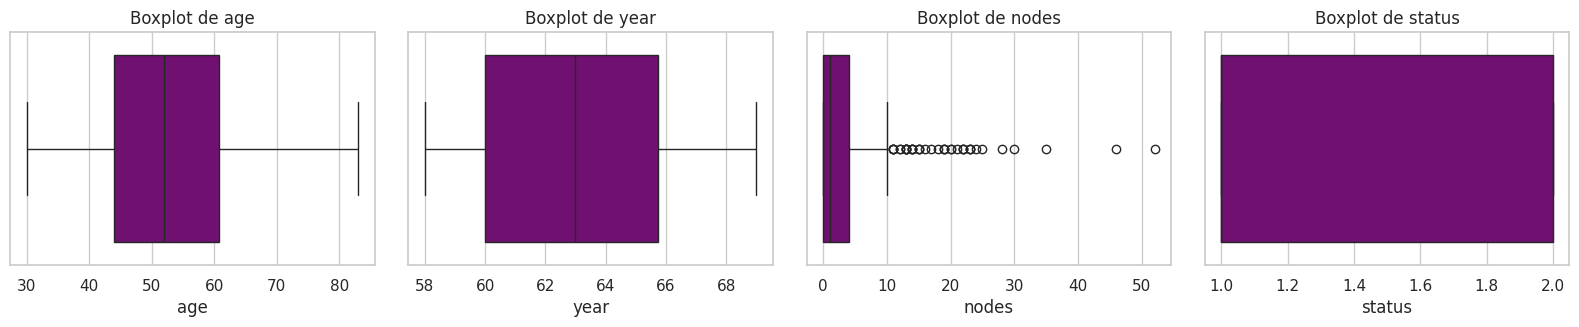

In [77]:
#Creamos boxplots para detectar outliers en las columnas númericas
plt.figure(figsize=(16, 12))
# Crear boxplots para cada columna numérica
for i, col in enumerate(num_columns, 1):
    plt.subplot(4, 4, i)  # 2 filas, 4 columnas de subplots
    sns.boxplot(x=df[col], color='purple')
    plt.title(f'Boxplot de {col}')
print('Gráficos de boxplots para columnas numericas:\n')
plt.tight_layout()
plt.show()

Matriz de correlación y mapa de calor:

             age      year     nodes    status
age     1.000000  0.089529 -0.063176  0.067950
year    0.089529  1.000000 -0.003764 -0.004768
nodes  -0.063176 -0.003764  1.000000  0.286768
status  0.067950 -0.004768  0.286768  1.000000


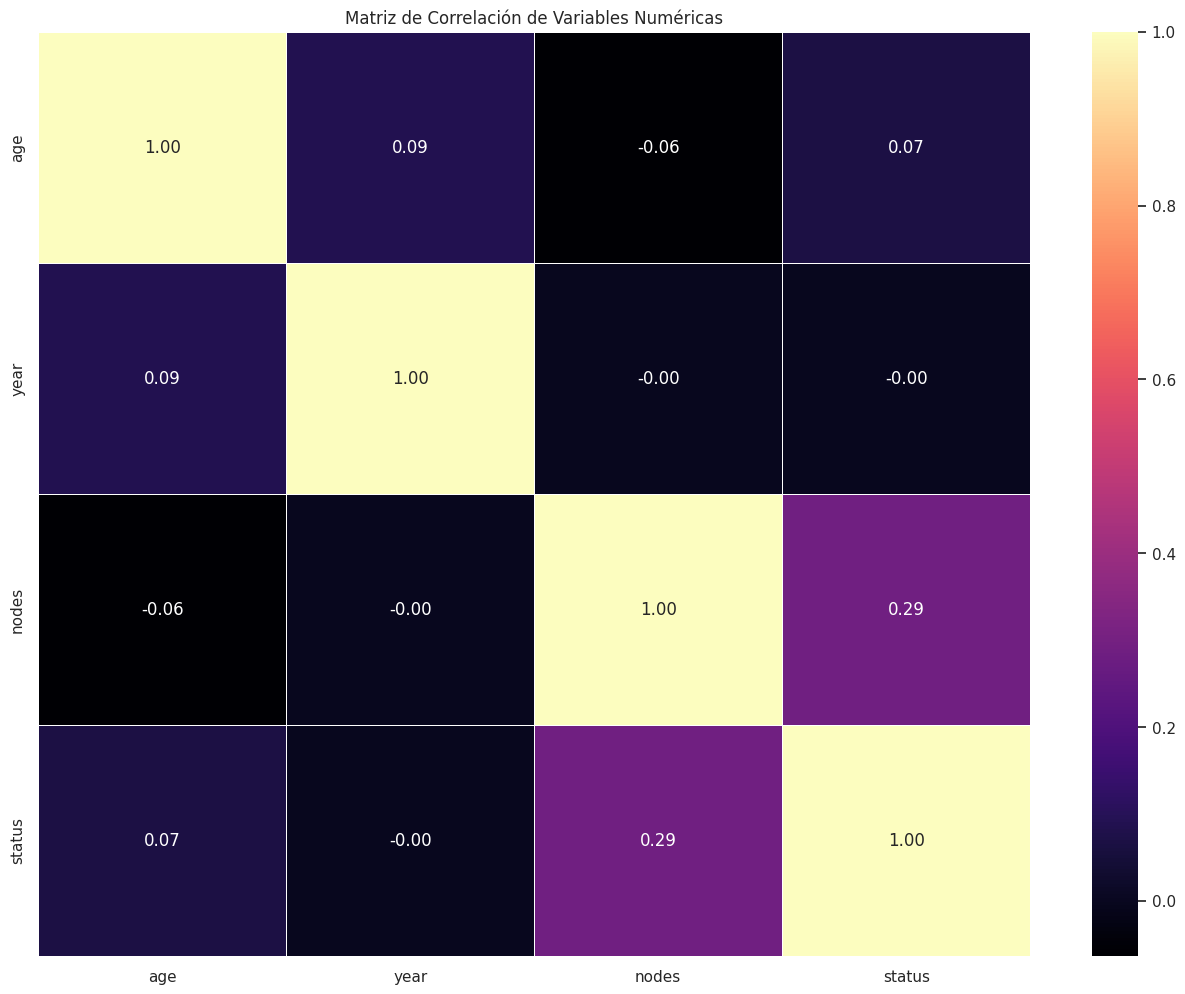

In [78]:
#Matriz de correlacion y mapa de calor
corr_matrix = df[num_columns].corr()
print("Matriz de correlación y mapa de calor:\n")
plt.figure(figsize=(16, 12))
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

Pairplot de Variables Numericas:



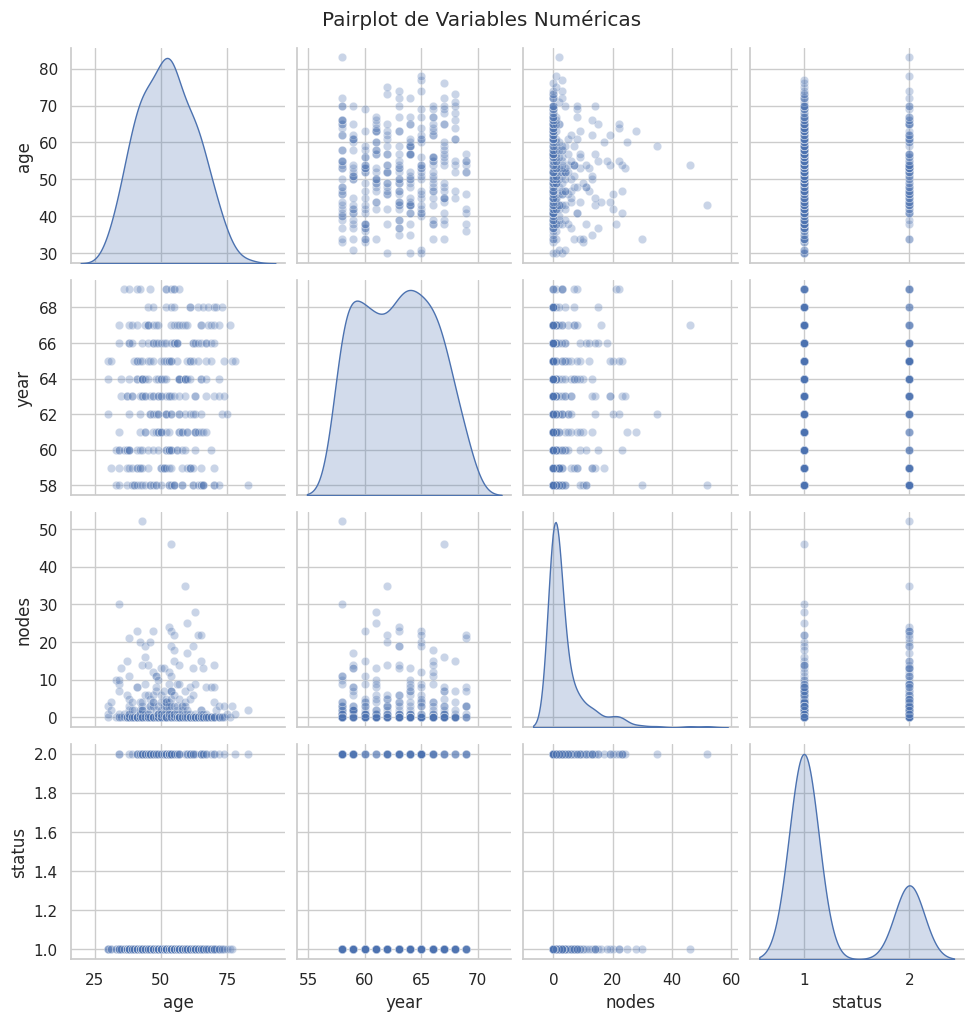

In [79]:
#Pairplot para ver relaciones entre variables numericas
print("Pairplot de Variables Numericas:\n")
sns.pairplot(df[num_columns], plot_kws={'alpha': 0.3}, diag_kind='kde')
plt.suptitle('Pairplot de Variables Numéricas', y=1.02)
plt.show()
print('\n')

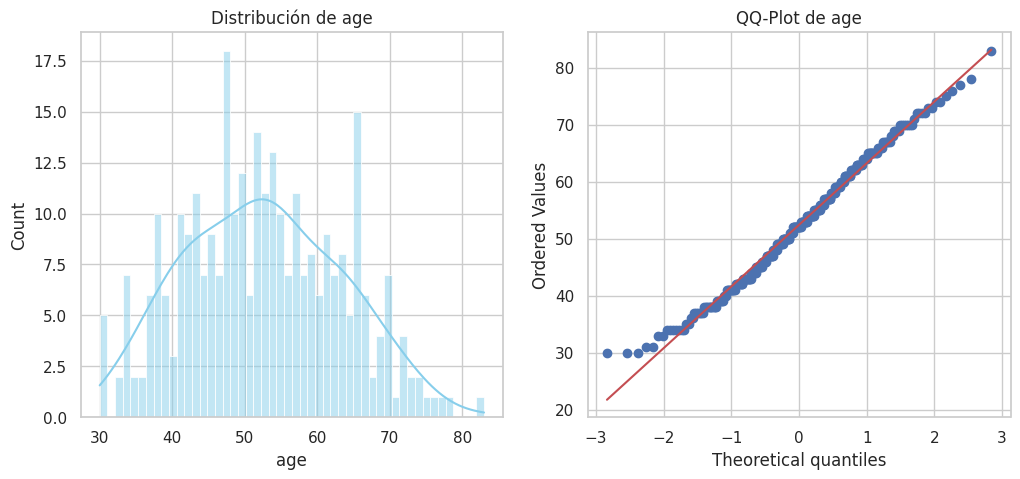


Pruebas de normalidad para la columna: age
Shapiro-Wilk Test: p-valor = 0.02605
Anderson-Darling Test: Estadístico = 0.73156
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos parecen normales.
  Al nivel de significancia 2.5%, los datos parecen normales.
  Al nivel de significancia 1.0%, los datos parecen normales.
Kolmogorov-Smirnov Test: p-valor = 0.46980


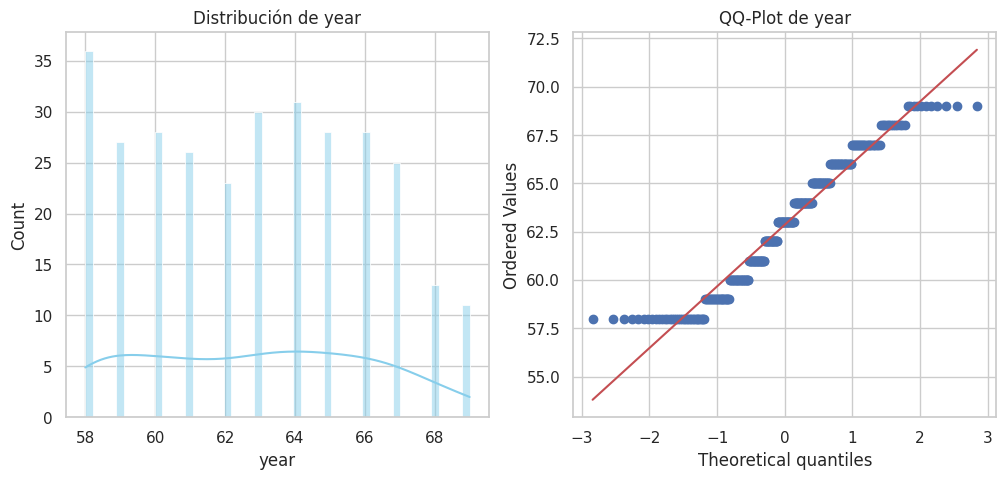


Pruebas de normalidad para la columna: year
Shapiro-Wilk Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 4.31374
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
Kolmogorov-Smirnov Test: p-valor = 0.00158


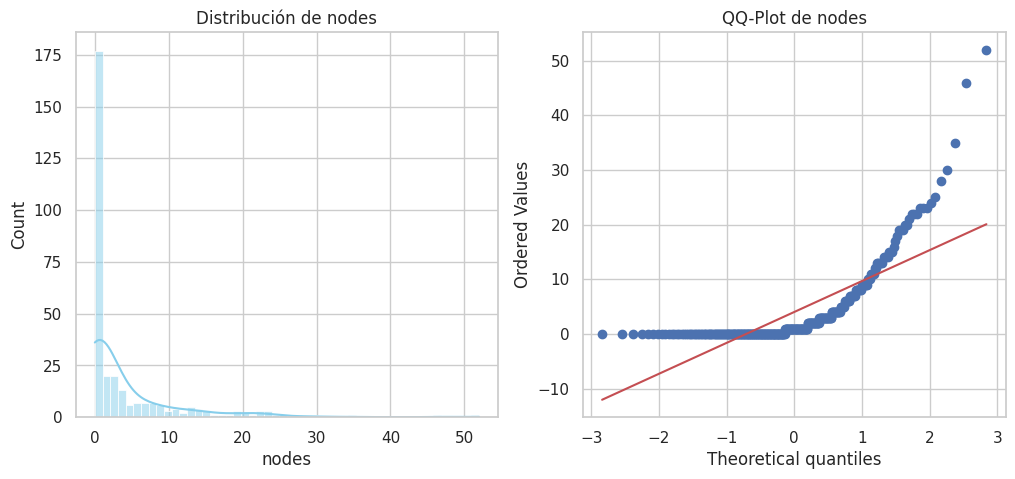


Pruebas de normalidad para la columna: nodes
Shapiro-Wilk Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 39.68662
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
Kolmogorov-Smirnov Test: p-valor = 0.00000


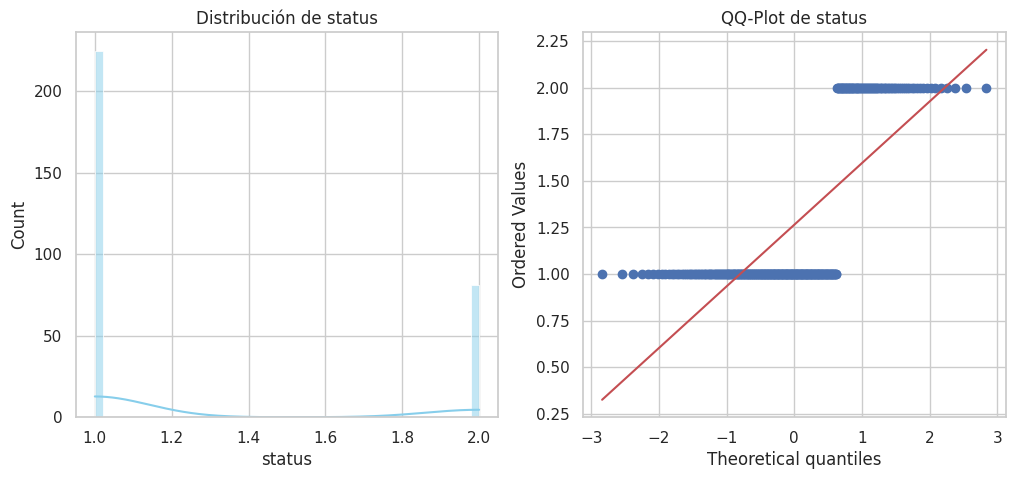


Pruebas de normalidad para la columna: status
Shapiro-Wilk Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 71.18230
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
Kolmogorov-Smirnov Test: p-valor = 0.00000


In [80]:
#Hacemos pruebas de normalidad en los datos:
# Función para realizar pruebas de normalidad
def normality_tests(data, column_name):
    print(f"\nPruebas de normalidad para la columna: {column_name}")
    # Prueba de Shapiro-Wilk
    shapiro_test = stats.shapiro(data.sample(min(5000, len(data)), random_state=42))  # Muestra de 5000 para evitar problemas de cómputo
    print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")
    # Prueba de Anderson-Darling
    anderson_test = stats.anderson(data, dist='norm')
    print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
    for i in range(len(anderson_test.critical_values)):
        sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
        if anderson_test.statistic < cv:
            print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
        else:
            print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")
    # Prueba de Kolmogorov-Smirnov
    ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:.5f}")

#Función para graficar histograma y QQ-Plot
def plot_distribution(data, column_name):
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=50, kde=True, color="skyblue")
    plt.title(f"Distribución de {column_name}")

    # QQ-Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.show()

#Aplicar pruebas de normalidad y gráficos a cada columna numérica
for column in num_columns:
    data = df[column]
    plot_distribution(data, column)
    normality_tests(data, column)

---
3. Identificar y tratar los datos faltantes utilizando técnicas como imputación por media, mediana o moda.

In [83]:
#Contamos el numero de filas con todos los datos repetidos eimpriimos el resultado
num_duplicated_rows = df.duplicated().sum()
print(f"Número de filas completamente duplicadas: {num_duplicated_rows}")
#Borramos los registros borrados quedandonos con la primera ocurrencia
df_cleaned = df.drop_duplicates(keep="first")
#Corroboramos la informacion imprimiendo filas completamente duplicadas
num_duplicated_rows_cleaned = df_cleaned.duplicated().sum()
duplicated_rows_cleaned = df_cleaned[df_cleaned.duplicated(keep=False)]
print(f"Número de filas completamente duplicadasen los datos retrabajados: {num_duplicated_rows_cleaned}")


Número de filas completamente duplicadas: 17
Número de filas completamente duplicadasen los datos retrabajados: 0


---
4. Repetir el EDA después del tratamiento de datos faltantes y comparar los resultados

In [85]:
print('Descripcion de los datos retrabajados (Estadisicas Descriptivas):\n')
print(df_cleaned.describe())

Descripcion de los datos retrabajados (Estadisicas Descriptivas):

              age        year       nodes      status
count  289.000000  289.000000  289.000000  289.000000
mean    52.422145   62.906574    4.221453    1.273356
std     10.876915    3.275794    7.325239    0.446455
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.000000   66.000000    5.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


Histograma para las columnas numericas retrabajadas:



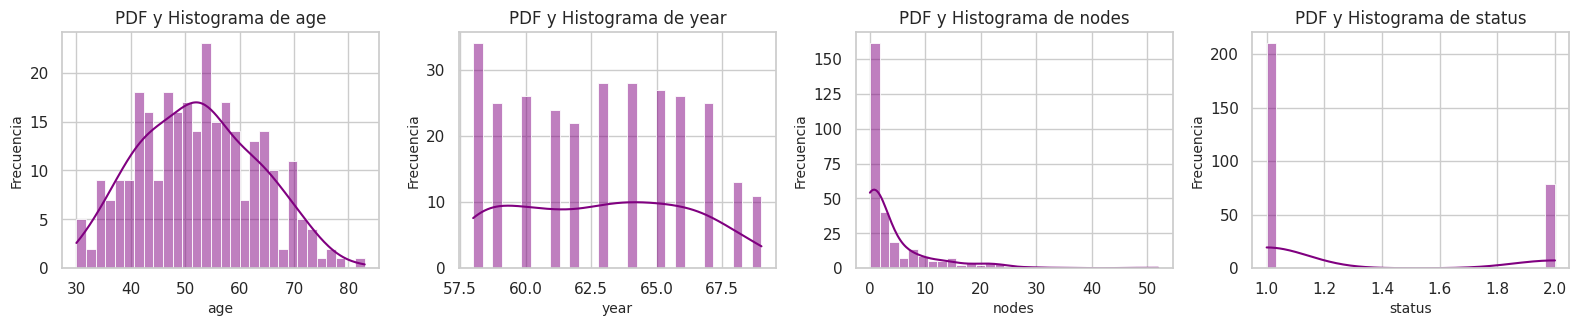

In [94]:
#Realizamos un histograma para cada columna numerica
num_columns_cleaned = df_cleaned.select_dtypes(include=['float64','int']).columns
#Creamos los gráficos de PDF e Histograma
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_columns_cleaned, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df_cleaned[col], kde=True, bins=30, color='purple')
    plt.title(f'PDF y Histograma de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)
print('Histograma para las columnas numericas retrabajadas:\n')
plt.tight_layout()
plt.show()

<ipython-input-92-06c9a5dbface>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=df_cleaned, palette='Accent')
<ipython-input-92-06c9a5dbface>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='status', data=df_cleaned, palette='Accent')


Gráficos de barras para columnas categorixas:



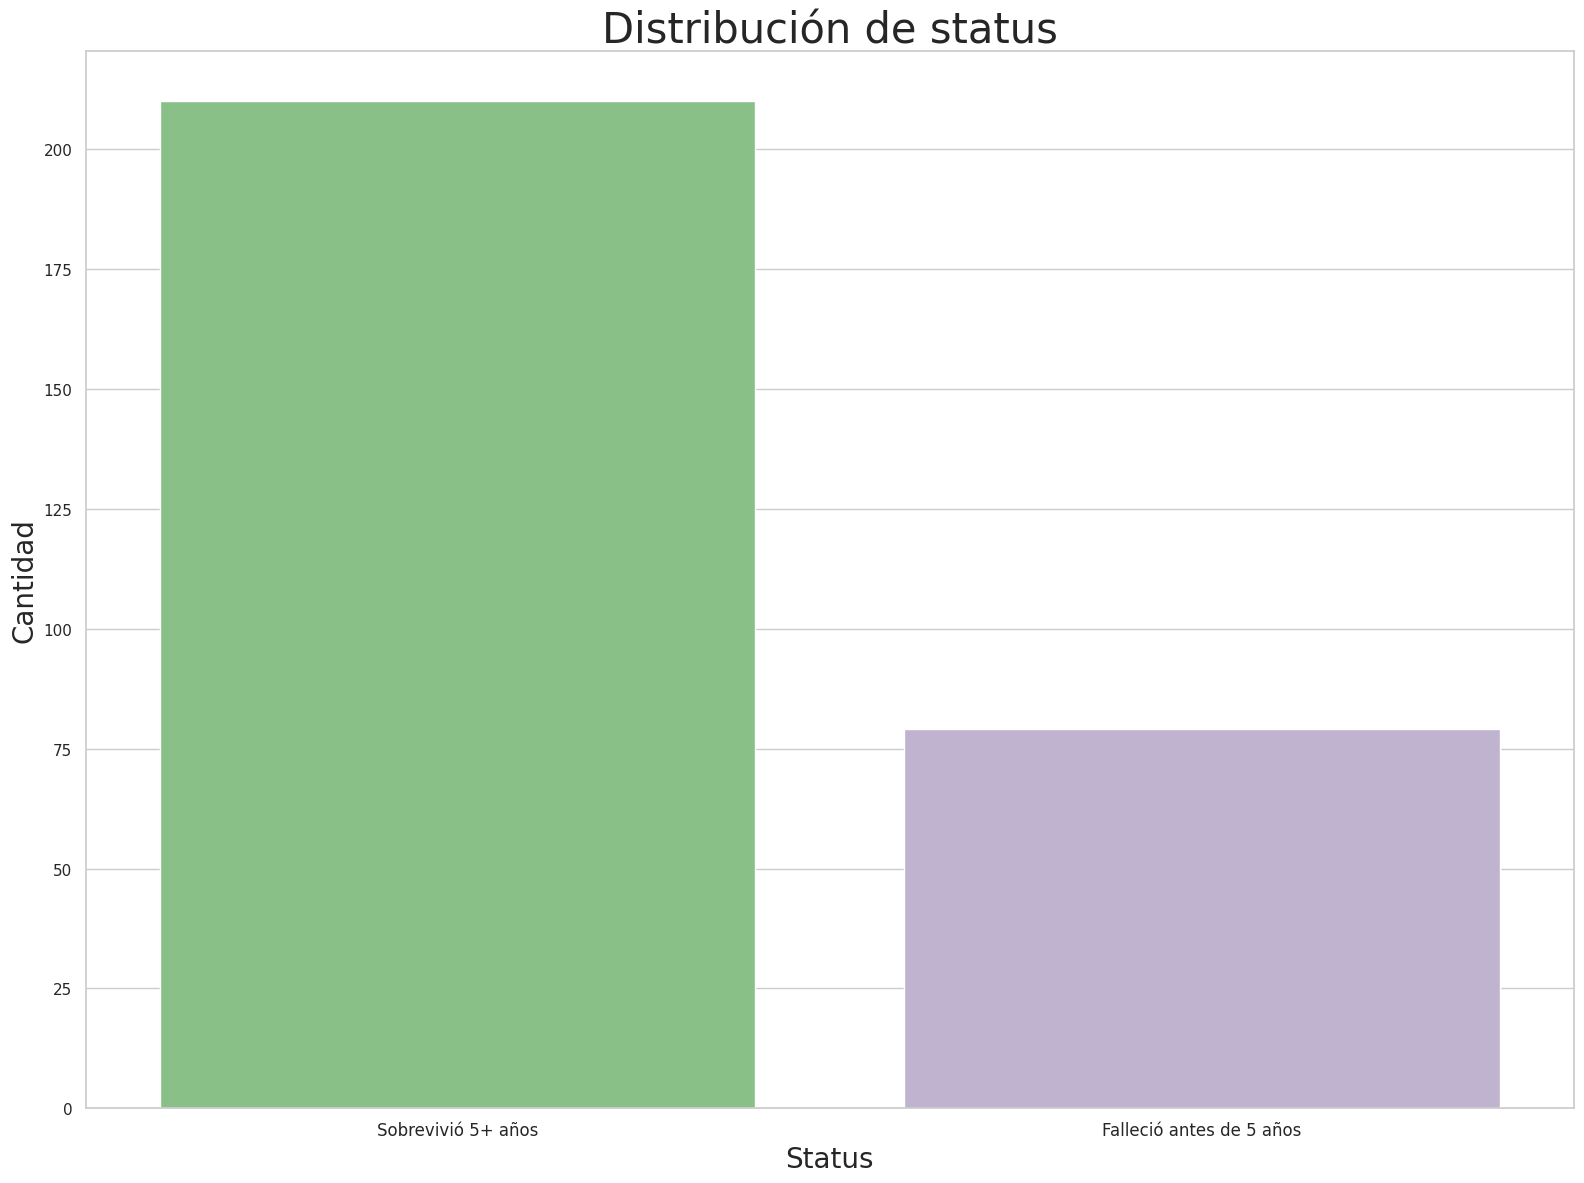

In [92]:
#Graficas de barras para las variables categorticas
#Crear gráficas de barras para cada variable categórica
plt.figure(figsize=(16, 12))
#Gráfica de barras para 'status'
sns.countplot(x='status', data=df_cleaned, palette='Accent')
plt.title('Distribución de status', fontsize = 30)
plt.xlabel('Status', fontsize = 20)
plt.ylabel('Cantidad', fontsize = 20)
ax = sns.countplot(x='status', data=df_cleaned, palette='Accent')
ax.set_xticks([0, 1])  # Posiciones en el eje X
ax.set_xticklabels(["Sobrevivió 5+ años", "Falleció antes de 5 años"], fontsize=12)
#Ajustar el layout y mostrar los gráficos
print('Gráficos de barras para columnas categorixas:\n')
plt.tight_layout()
plt.show()

Gráficos de boxplots para columnas numericas retrabajadas:



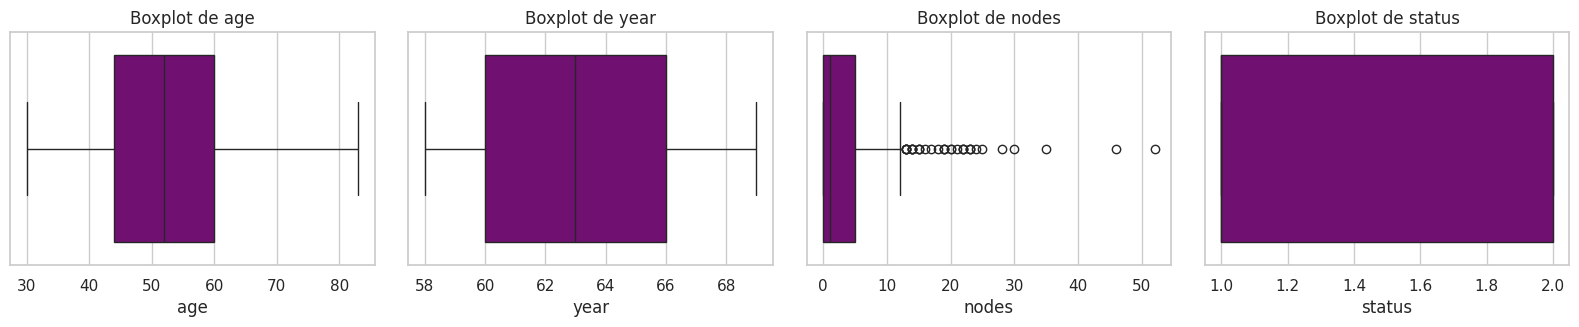

In [97]:
#Creamos boxplots para detectar outliers en las columnas númericas
plt.figure(figsize=(16, 12))
# Crear boxplots para cada columna numérica
for i, col in enumerate(num_columns_cleaned, 1):
    plt.subplot(4, 4, i)  # 2 filas, 4 columnas de subplots
    sns.boxplot(x=df_cleaned[col], color='purple')
    plt.title(f'Boxplot de {col}')
print('Gráficos de boxplots para columnas numericas retrabajadas:\n')
plt.tight_layout()
plt.show()

Matriz de correlación y mapa de calor:

             age      year     nodes    status
age     1.000000  0.088329 -0.061317  0.082693
year    0.088329  1.000000 -0.004923 -0.006219
nodes  -0.061317 -0.004923  1.000000  0.275520
status  0.082693 -0.006219  0.275520  1.000000


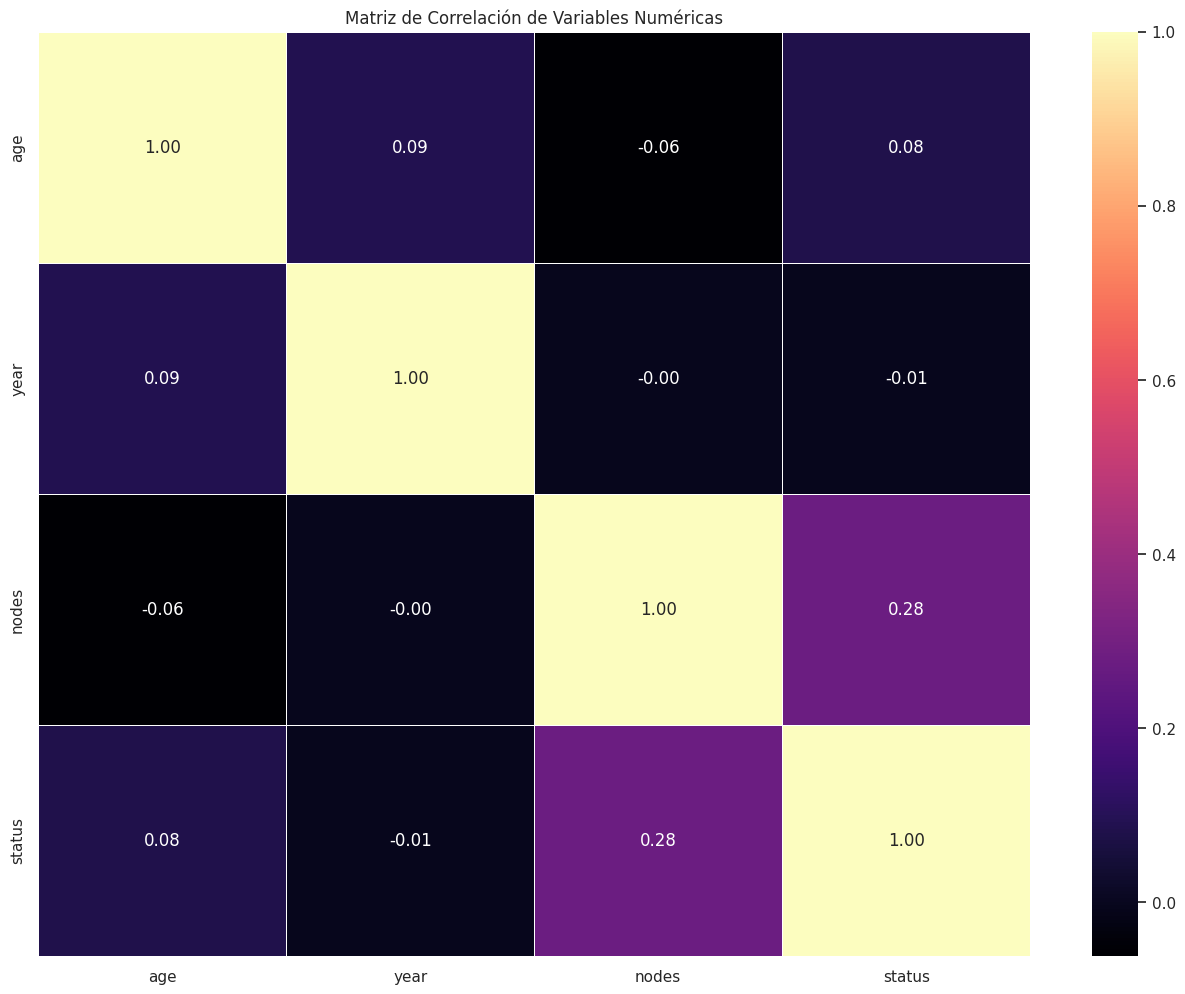

In [98]:
#Matriz de correlacion y mapa de calor
corr_matrix_cleaned = df_cleaned[num_columns_cleaned].corr()
print("Matriz de correlación y mapa de calor:\n")
plt.figure(figsize=(16, 12))
print(corr_matrix_cleaned)
sns.heatmap(corr_matrix_cleaned, annot=True, cmap='magma', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

Pairplot de Variables Numericas:



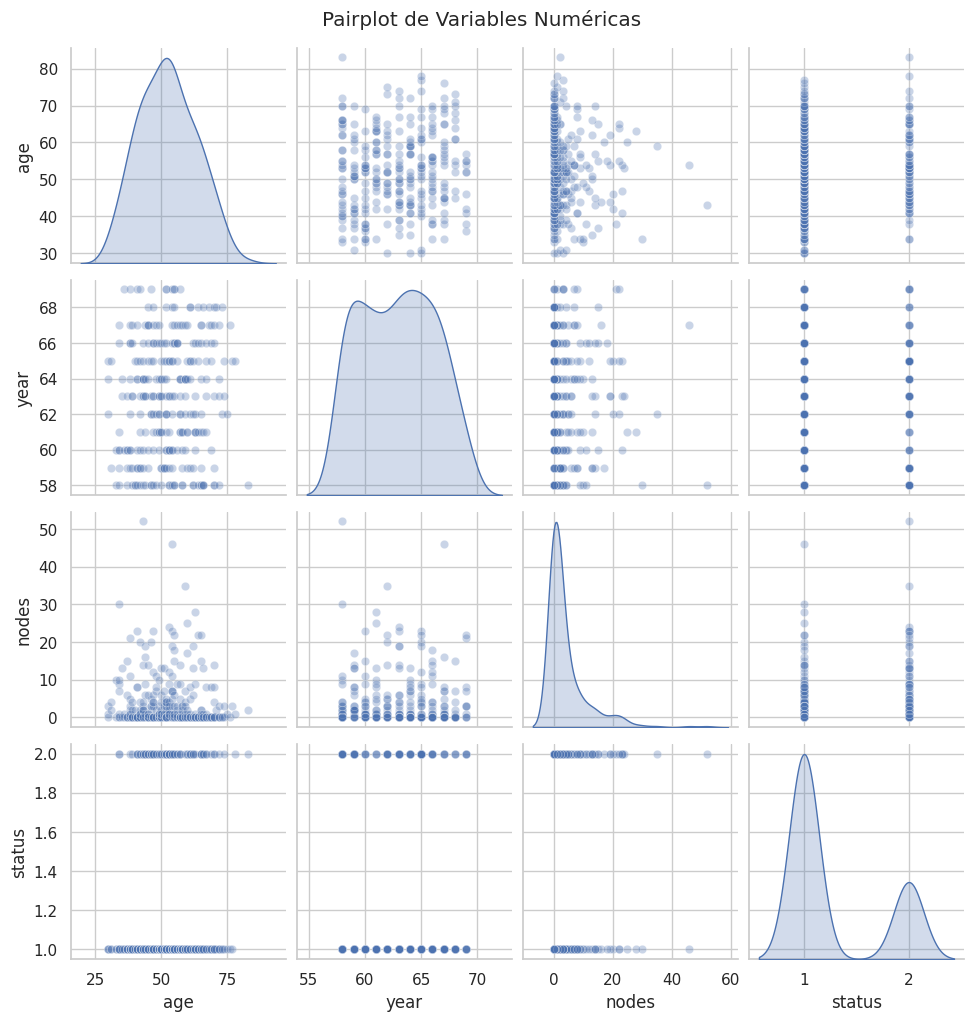

In [100]:
#Pairplot para ver relaciones entre variables numericas
print("Pairplot de Variables Numericas:\n")
sns.pairplot(df_cleaned[num_columns_cleaned], plot_kws={'alpha': 0.3}, diag_kind='kde')
plt.suptitle('Pairplot de Variables Numéricas', y=1.02)
plt.show()
print('\n')

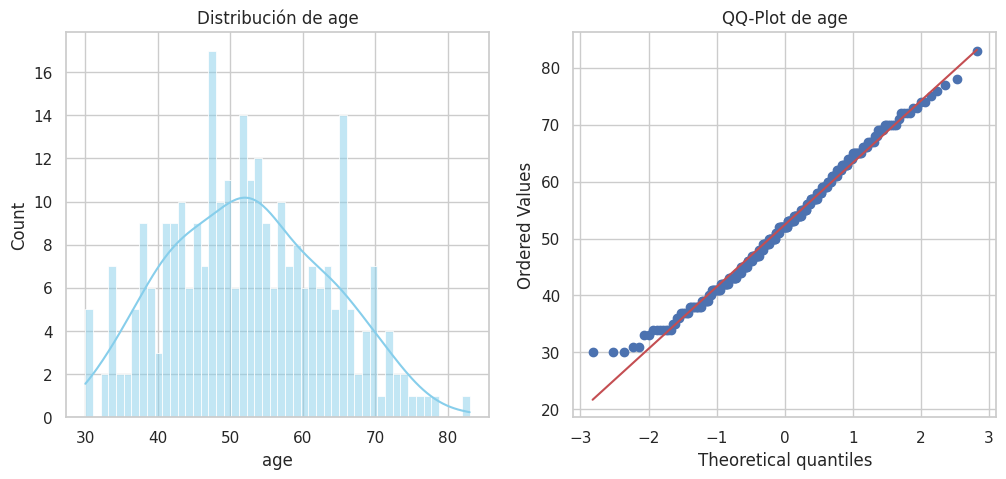


Pruebas de normalidad para la columna: age
Shapiro-Wilk Test: p-valor = 0.03203
Anderson-Darling Test: Estadístico = 0.68222
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos parecen normales.
  Al nivel de significancia 2.5%, los datos parecen normales.
  Al nivel de significancia 1.0%, los datos parecen normales.
Kolmogorov-Smirnov Test: p-valor = 0.56971


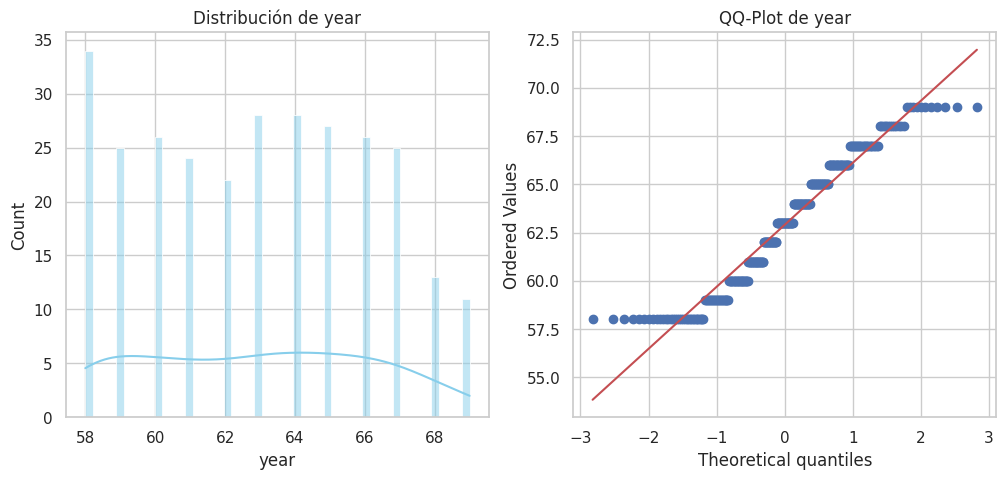


Pruebas de normalidad para la columna: year
Shapiro-Wilk Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 4.12975
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
Kolmogorov-Smirnov Test: p-valor = 0.00257


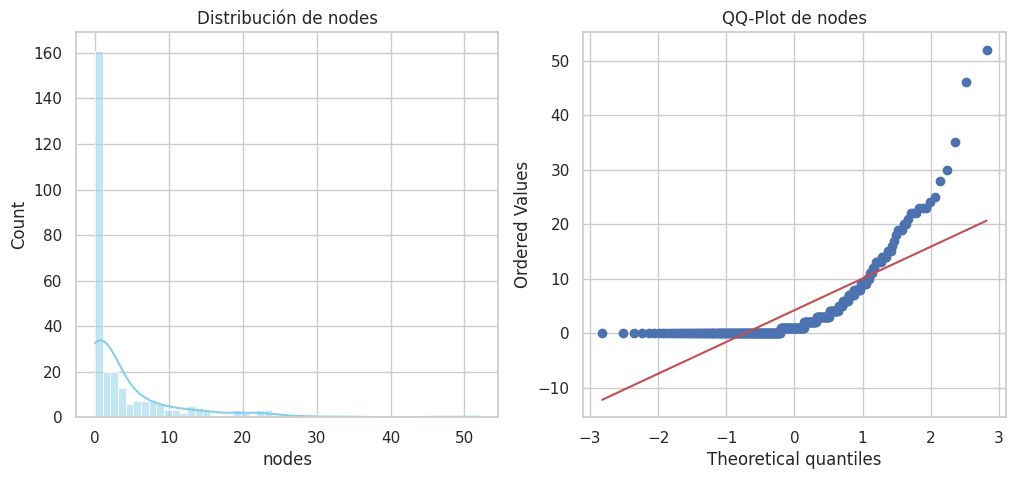


Pruebas de normalidad para la columna: nodes
Shapiro-Wilk Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 35.87851
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
Kolmogorov-Smirnov Test: p-valor = 0.00000


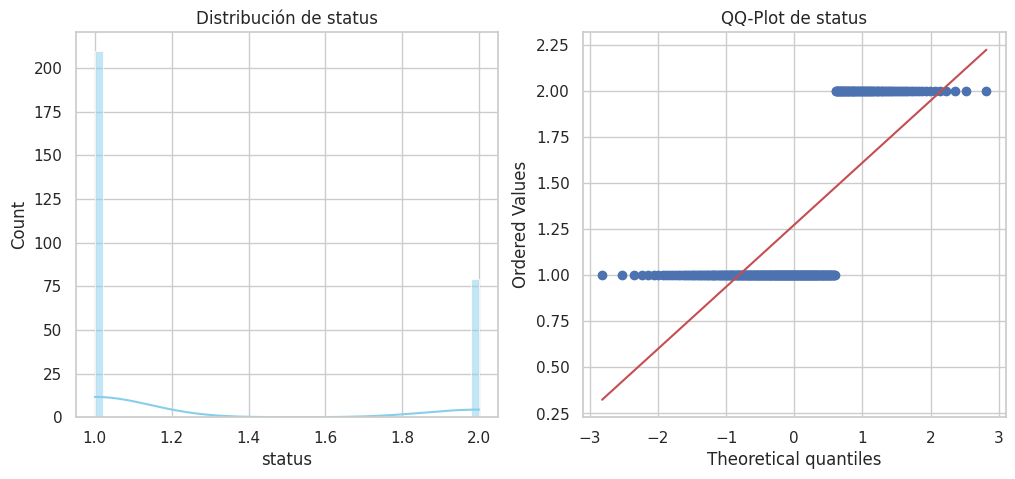


Pruebas de normalidad para la columna: status
Shapiro-Wilk Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 66.10130
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
Kolmogorov-Smirnov Test: p-valor = 0.00000


In [101]:
#Hacemos pruebas de normalidad en los datos:
# Función para realizar pruebas de normalidad
def normality_tests(data, column_name):
    print(f"\nPruebas de normalidad para la columna: {column_name}")
    # Prueba de Shapiro-Wilk
    shapiro_test = stats.shapiro(data.sample(min(5000, len(data)), random_state=42))  # Muestra de 5000 para evitar problemas de cómputo
    print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")
    # Prueba de Anderson-Darling
    anderson_test = stats.anderson(data, dist='norm')
    print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
    for i in range(len(anderson_test.critical_values)):
        sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
        if anderson_test.statistic < cv:
            print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
        else:
            print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")
    # Prueba de Kolmogorov-Smirnov
    ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:.5f}")

#Función para graficar histograma y QQ-Plot
def plot_distribution(data, column_name):
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=50, kde=True, color="skyblue")
    plt.title(f"Distribución de {column_name}")

    # QQ-Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.show()

#Aplicar pruebas de normalidad y gráficos a cada columna numérica
for column in num_columns:
    data = df_cleaned[column]
    plot_distribution(data, column)
    normality_tests(data, column)

---

5.  Responde a las preguntas y sube las concluciones a un PDF.